In [1]:
from main import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ls data/

robustness_200x50_v0/ robustness_200x50_v1/ simulation.prof


In [15]:
# load simulation results
file_path = 'data/robustness_200x50_v1/'
results = load_results_from_json(file_path)

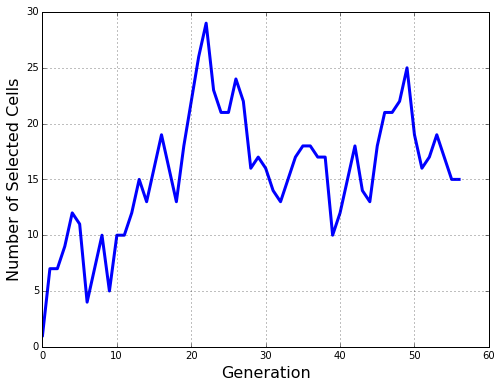

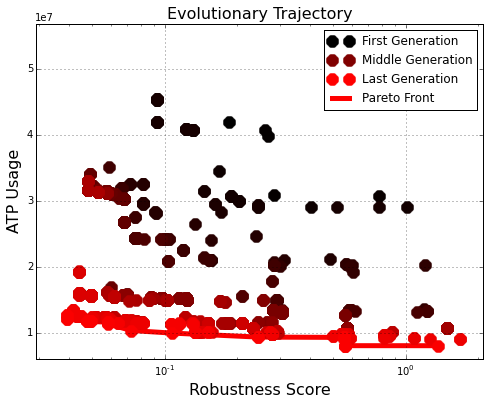

In [16]:
# plot population size
ax = plot_pareto_front_size(results)

# plot 2D evolutionary trajectory
ax = plot_2D_trajectory(results, obj=(0, 1), connect_front=True, labels=['Robustness Score', 'ATP Usage'])
# ax.set_ylim(4.6e7, 4.8e7)
ax.set_yscale('linear')

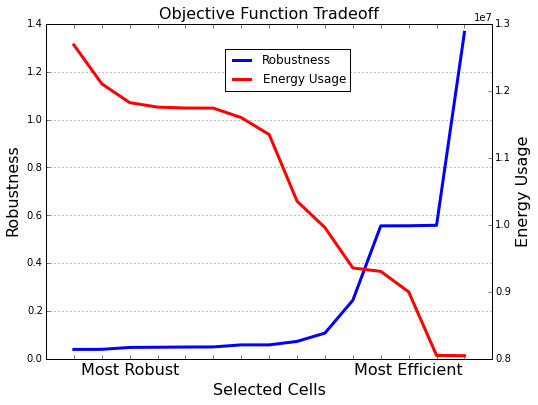

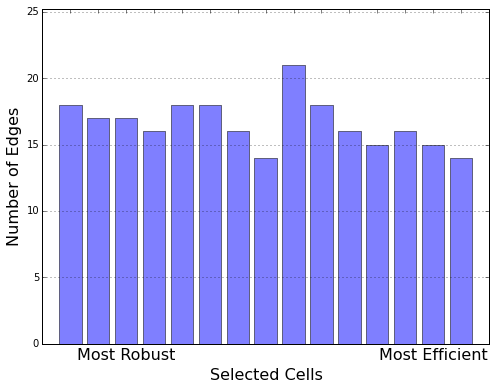

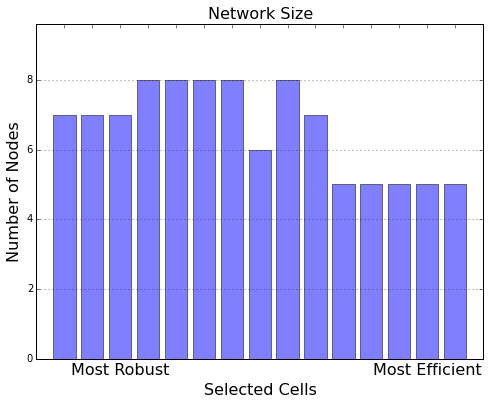

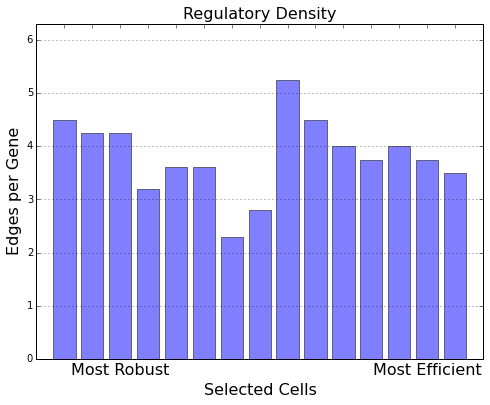

In [17]:
# get topological features from pareto front, ordered from most robust to most efficient
robustness, energy_usage, edge_count, node_count, edges_per_node, edges_per_gene = get_topology_from_front(results)
    
# plot edges vs position on pareto front

ax = plot_pareto_objective_tradeoff(metrics=[robustness, energy_usage], metric_names=['Robustness', 'Energy Usage'], plot_title='Objective Function Tradeoff')
    
# plot edges vs position on pareto front
ax = plot_metric(edge_count, 'Number of Edges')

# plot edges vs position on pareto front
ax1 = plot_metric(node_count, 'Number of Nodes', plot_title='Network Size')

# plot edges vs position on pareto front
ax2 = plot_metric(edges_per_gene, 'Edges per Gene', 'Regulatory Density')

In [ ]:
# plot edge type count vs rank

Reaction Type          Reactants    Enzymes    Products
---------------------  -----------  ---------  ----------
modification           [1]          []         [4]
modification           [4]          []         [1]
catalytic_degradation  [1]          [4]        []
catalytic_degradation  [0]          [1]        []
miRNA_silencing        [2, 2]       []         []
miRNA_silencing        [2, 1]       []         []
catalytic_degradation  [4]          [0]        []
miRNA_silencing        [2, 0]       []         []


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
repression                     2                       0
repression                     0                       0
repression                     0                       1
repression                     2                       4
repression                     1                       4
activation                     2                       1
repression                

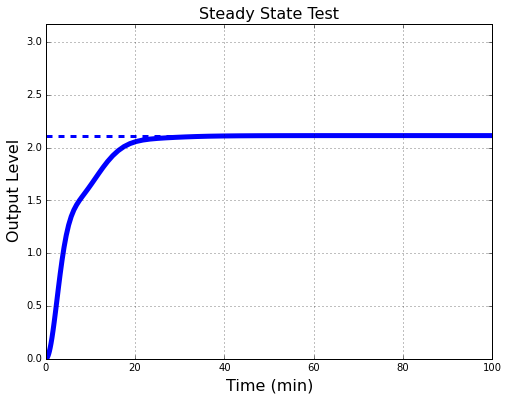

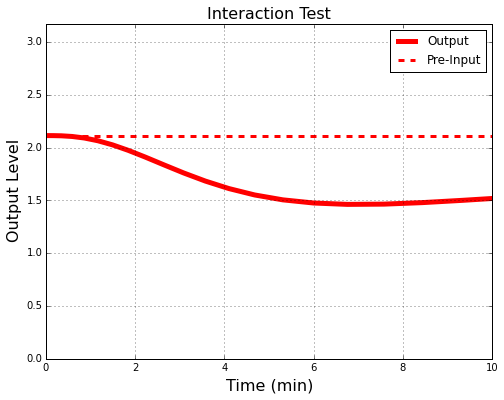

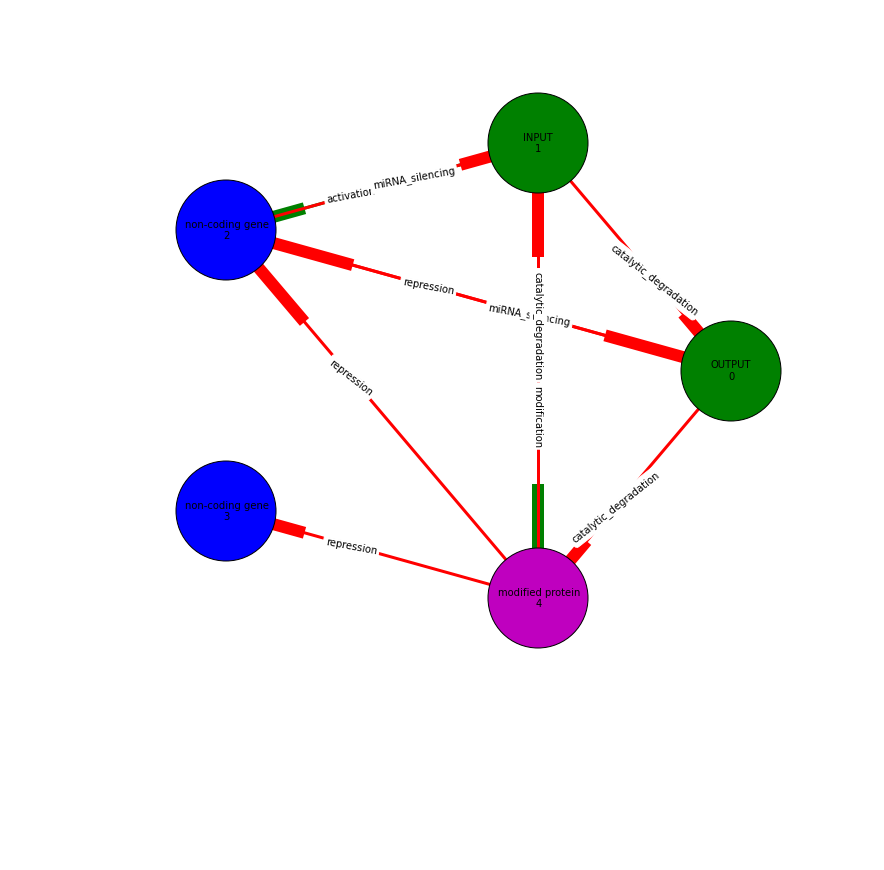

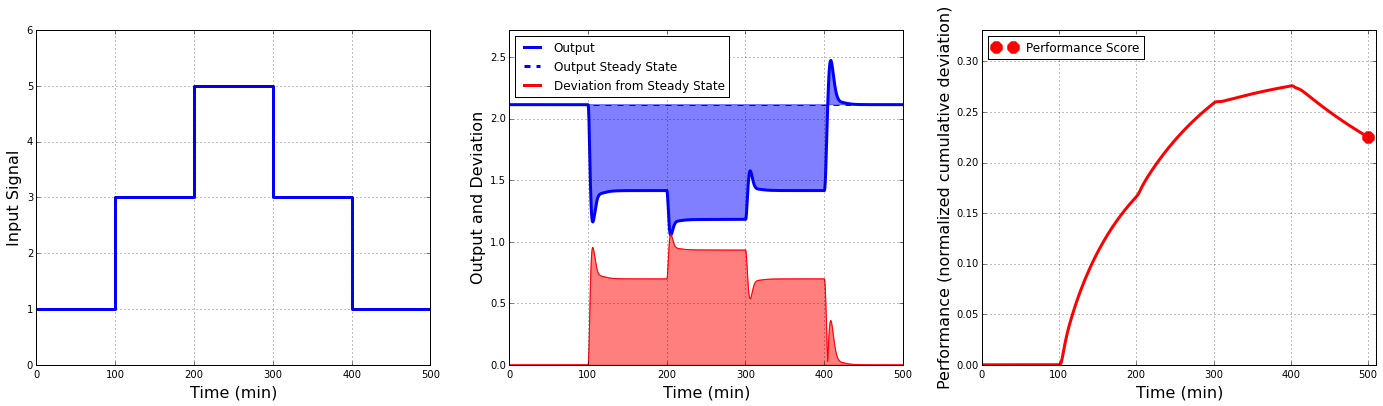

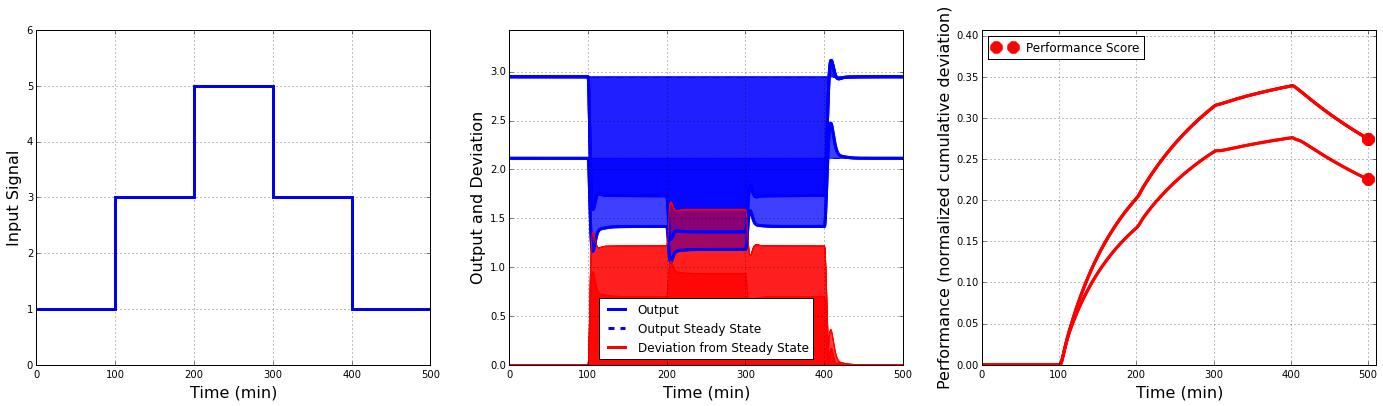

In [18]:
# analyze a single cell

# select a cell from the population
cell_num = 0
cell = list(results[len(results)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

# run robustness test
scores = robustness_test(cell, num_mutants=10, input_node=2, output_node=1, steady_states=None, plot=True)

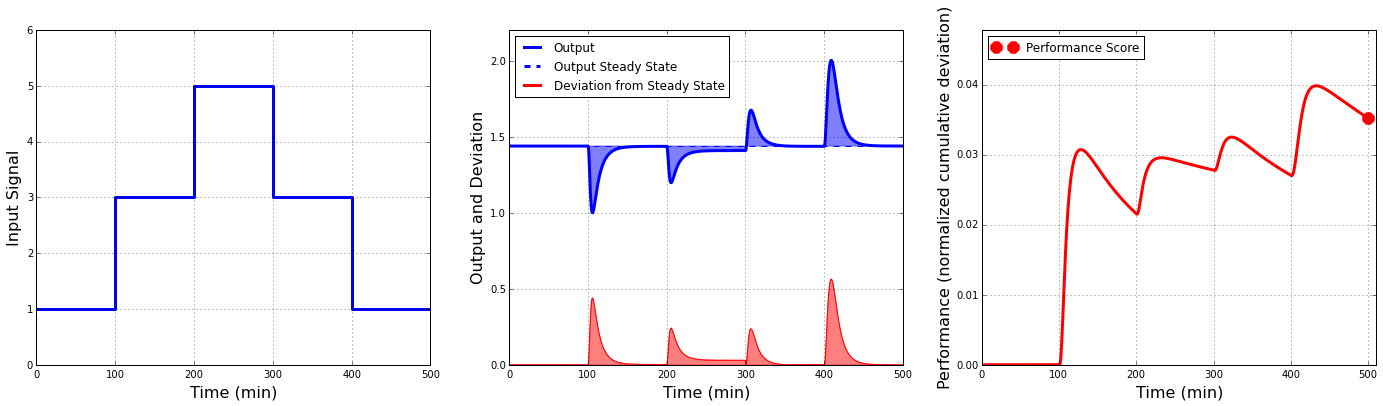

In [20]:
# select a cell from the population
cell_num = 1
cell = list(results[len(results)-1].items())[cell_num][0]


# run adaptation test
score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)

In [22]:
cell.show_reactions()

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
modification            [3]          []         [4]
modification            [4]          []         [3]
catalytic_degradation   [3]          [4]        []
catalytic_degradation   [1]          [3]        []
modification            [4]          []         [3]
modification            [3]          []         [10]
catalytic_degradation   [10]         [1]        []
miRNA_silencing         [9, 8]       []         []
modification            [1]          []         [11]
catalytic_modification  [10]         [1]        [3]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       4
repression                     2                       1
repression                     0                       1
repression                     2                       3
repression            